# Performance Comparison of Machine Learning Algorithms in Predicting Hypertension Cases

#### The goal of this application:
The objective of this appication is to build a model that is capable of determining an
individual's hypertension status (yes/no)

#### Brief description of the dataset:
The dataset comprises of medical information about Framingham, Massachusetts residents,
with a specific emphasis on cardiovascular health. This publicly accessible dataset
encompasses more than 4,000 records and includes 15 attributes.

#### Data Source:
The data was sourced from Kaggle via the link below:
https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logisticregression



## A. Loading and Previewing the Dataset

In [134]:
#importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import time
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier, plot_tree




This code imports a dataset named "Heart data.csv" using Pandas and checks its dimensions (number of rows and columns) using the shape attribute.

In [135]:
#importing the dataset
Heart_data=pd.read_csv("Heart data.csv")
#checking the number of rows and columns in the dataset
Heart_data.shape

(4238, 16)

In [136]:
# Previewing the first 5 rows of the dataset
Heart_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [137]:
# Previewing the last 5 rows of the dataset
Heart_data.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


This code snippet reorders the columns in the Heart_data DataFrame according to a specified sequence and displays the first 5 rows of the reordered dataset.

In [138]:
#Reordering the variables
Heart_data = Heart_data[['age', 'male', 'education', 'cigsPerDay','BPMeds', 'prevalentStroke', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'currentSmoker', 'TenYearCHD', 'prevalentHyp']]
# Previewing the first 5 rows of the dataset
Heart_data.head()

,age,male,education,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,currentSmoker,TenYearCHD,prevalentHyp
0,39,1,4.0,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,0
1,46,0,2.0,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,0
2,48,1,1.0,20.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,1,0,0
3,61,0,3.0,30.0,0.0,0,0,225.0,150.0,95.0,28.58,65.0,103.0,1,1,1
4,46,0,3.0,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,1,0,0


In [139]:
#renaming the variable "male" to "gender"
Heart_data.rename(columns={'male': 'gender'}, inplace=True)


In [140]:
#Printing the list of columns and their data types
Heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              4238 non-null   int64  
 1   gender           4238 non-null   int64  
 2   education        4133 non-null   float64
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   diabetes         4238 non-null   int64  
 7   totChol          4188 non-null   float64
 8   sysBP            4238 non-null   float64
 9   diaBP            4238 non-null   float64
 10  BMI              4219 non-null   float64
 11  heartRate        4237 non-null   float64
 12  glucose          3850 non-null   float64
 13  currentSmoker    4238 non-null   int64  
 14  TenYearCHD       4238 non-null   int64  
 15  prevalentHyp     4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


## B. Exploratory Data Analyses


 ###### i. Exploring the distribution of the variables

Created a new DataFrame named `numeric_data` containing only the selected numeric variables ('age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose') from the `Heart_data` DataFrame. It then prints the first few rows of this new DataFrame using the `head()` function.

In [141]:
# Creating a dataframe for the numeric variables
selected_numeric_variables = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
numeric_data = Heart_data[selected_numeric_variables]
# Previewing the first
print(numeric_data.head())

   age  cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose
0   39         0.0    195.0  106.0   70.0  26.97       80.0     77.0
1   46         0.0    250.0  121.0   81.0  28.73       95.0     76.0
2   48        20.0    245.0  127.5   80.0  25.34       75.0     70.0
3   61        30.0    225.0  150.0   95.0  28.58       65.0    103.0
4   46        23.0    285.0  130.0   84.0  23.10       85.0     85.0


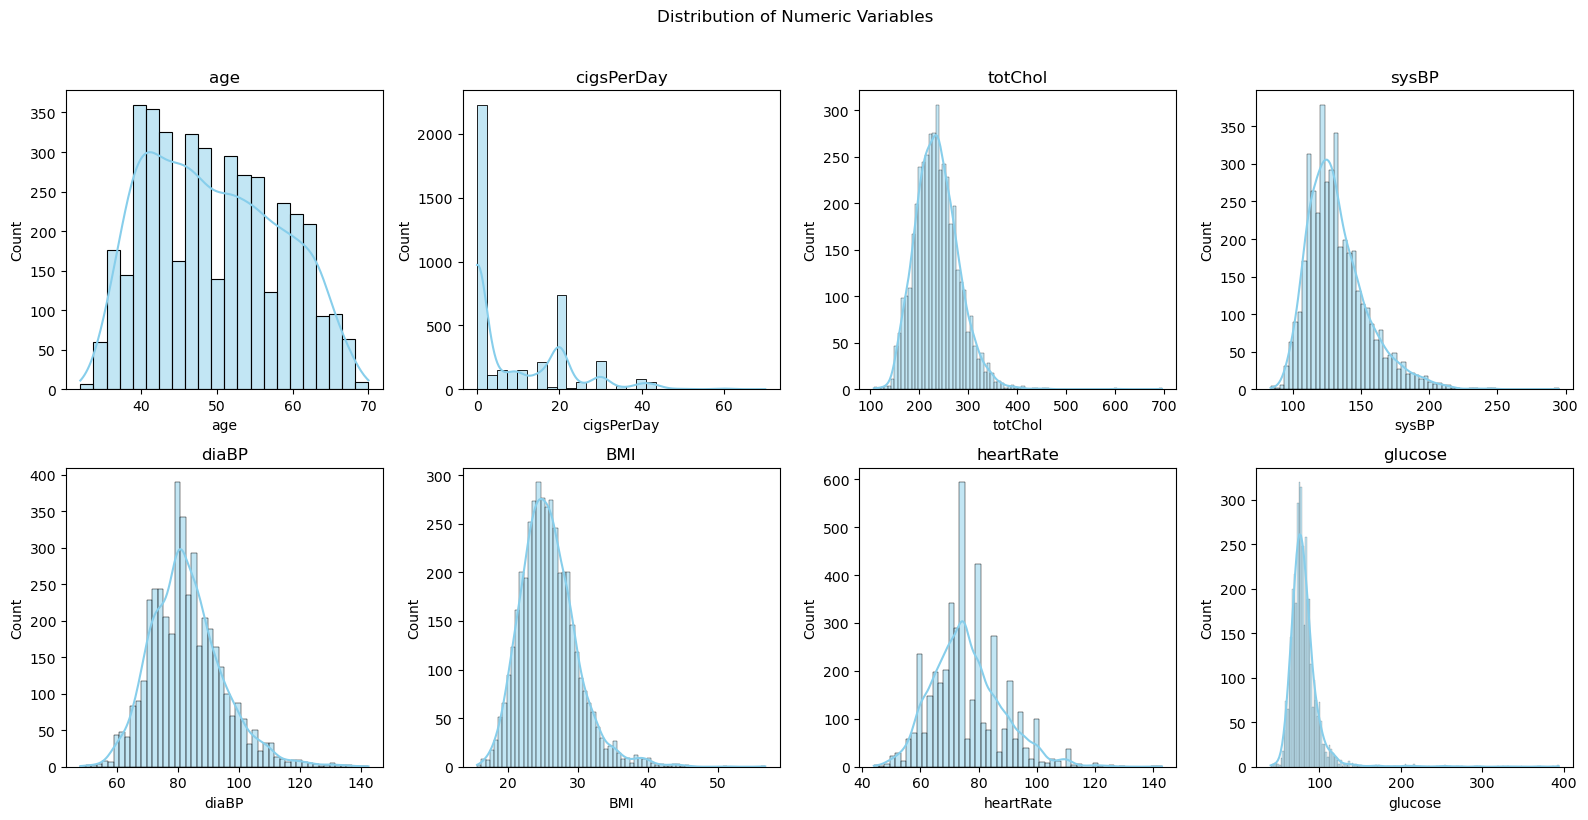

In [142]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle('Distribution of Numeric Variables', y=1.02)
# Flattening the axes for easier iteration
axes = axes.flatten()
# Plotting histograms for each numeric variable
for i, column in enumerate(numeric_data.columns):
 sns.histplot(data=numeric_data, x=column, kde=True, ax=axes[i], color='skyblue')
 axes[i].set_title(column)
# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

Observation:
Most of the distribution of the numeric variables appeared to be asymmetric, as observed in the histograms. This suggests that the data is not perfectly symmetrical around the mean and may have skewness towards one tail of the distribution. Such asymmetry can influence the choice of analyses and modeling techniques, prompting the need for further exploration and potentially requiring data transformation for certain analyses.

###### ii. Exploring the data for missing values

In [ ]:
# Checking for missing values in each column
missing_values = Heart_data.isnull().sum()
# Displaying the count of missing values for each column
print("Missing values in each column:")
print(missing_values)


Given the asymmetric distribution of most numeric variables, handling missing values involves replacing them with the median to maintain the central tendency and mitigate the impact of outliers. Meanwhile, for categorical variables, missing entries are substituted with the mode to preserve the most frequently occurring value and retain the categorical integrity of the data. This approach ensures robustness in data preprocessing, maintaining representativeness while addressing missingness across different variable types.


This code snippet filled in missing values in the "education" and "BPMeds" columns of the Heart_data DataFrame. It replaced these missing values with the most common value (mode) found in each respective column, ensuring completeness in the dataset.

In [143]:
#replacing missing values in categorical variables with the mode
Heart_data["education"].fillna(value=Heart_data['education'].mode()[0],inplace=True)
Heart_data["BPMeds"].fillna(value=Heart_data['BPMeds'].mode()[0],inplace=True)

This code segment filled in missing values in the numerical variables "totChol", "BMI", "cigsPerDay", "heartRate", and "glucose" of the Heart_data DataFrame with their respective medians. It iterated through each selected variable, calculated the median value using the median() method, and replaced missing entries with this median value using the fillna() method.

In [144]:
#replacing missing values in the numerical variables with the median
selected_variables = ['totChol', 'BMI','cigsPerDay', 'heartRate', 'glucose']
for variable in selected_variables:
 median_value = Heart_data[variable].median()
 Heart_data[variable].fillna(median_value, inplace=True)


In [145]:
# Checking for missing values in each column after replacement
missing_values = Heart_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age                0
gender             0
education          0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
currentSmoker      0
TenYearCHD         0
prevalentHyp       0
dtype: int64


##### iii. Exploring the data for outliers

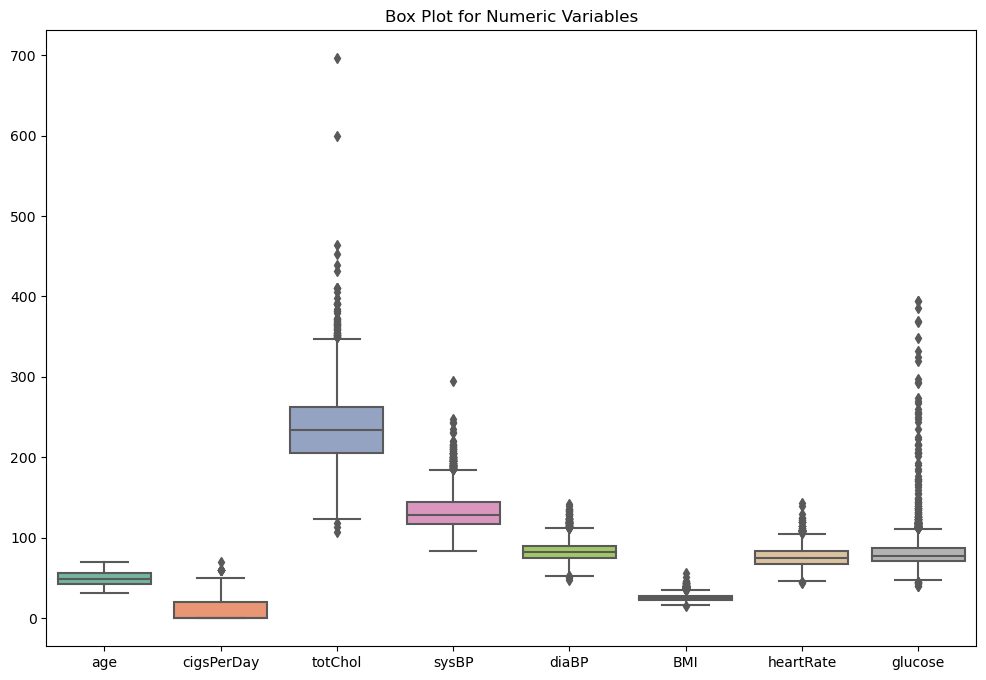

In [146]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_data, palette='Set2')
plt.title('Box Plot for Numeric Variables')
plt.show()


Observation: There are outliers in the dataset. This will be addressed using the normalization
technique later on

In [147]:
#Printing the descriptive statistics of the the data
Heart_data. describe()

,age,gender,education,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,currentSmoker,TenYearCHD,prevalentHyp
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,49.584946,0.429212,1.954696,8.941482,0.029259,0.005899,0.025720,236.689476,132.352407,82.893464,25.800205,75.878716,81.603587,0.494101,0.151958,0.310524
std,8.572160,0.495022,1.018510,11.902399,0.168552,0.076587,0.158316,44.327427,22.038097,11.910850,4.071041,12.025185,22.865246,0.500024,0.359023,0.462763
min,32.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000,0.000000,0.000000
50%,49.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000,0.000000,0.000000
75%,56.000000,1.000000,3.000000,20.000000,0.000000,0.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,1.000000,0.000000,1.000000
max,70.000000,1.000000,4.000000,70.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000,1.000000,1.000000


In [148]:
#creating a copy of the data
Heart_labeled = Heart_data.copy()

I labeled the categorical variables in the Heart_labeled DataFrame for easier interpretation during Exploratory Data Analysis (EDA). 

In [149]:
# labeling the data for Exploratory Data Analyses
Heart_labeled["gender"].replace({1: 'Male', 0: 'Female'}, inplace=True)
Heart_labeled["currentSmoker"].replace({1:'Yes', 0: 'No'}, inplace=True)
Heart_labeled["BPMeds"].replace({1:'Yes', 0: 'No'}, inplace=True)
Heart_labeled["prevalentStroke"].replace({1:'Yes', 0: 'No'}, inplace=True)
Heart_labeled["diabetes"].replace({1:'Yes', 0: 'No'}, inplace=True)
Heart_labeled["prevalentHyp"].replace({1:'Yes', 0: 'No'}, inplace=True)
Heart_labeled["TenYearCHD"].replace({1:'Yes', 0: 'No'}, inplace=True)

In [150]:
Heart_labeled.head()

,age,gender,education,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,currentSmoker,TenYearCHD,prevalentHyp
0,39,Male,4.0,0.0,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No,No,No
1,46,Female,2.0,0.0,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No,No,No
2,48,Male,1.0,20.0,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,Yes,No,No
3,61,Female,3.0,30.0,No,No,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes,Yes,Yes
4,46,Female,3.0,23.0,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,Yes,No,No


##### iii. Univariate Analyses

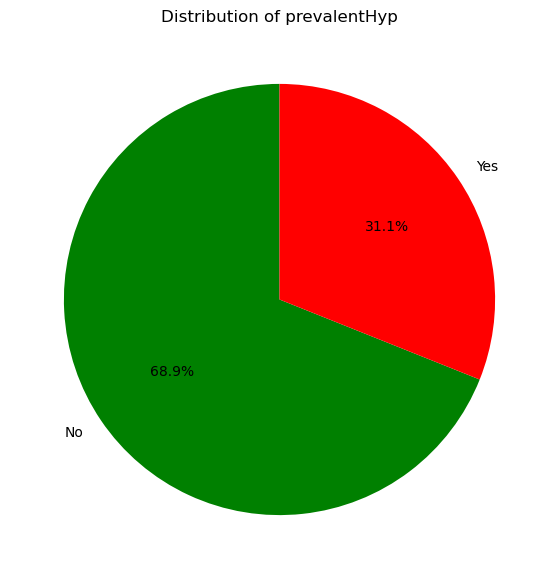

In [151]:
#Distribution of heart disease

# Calculating the counts for 'TenYearCHD'
chd_counts = Heart_labeled['prevalentHyp'].value_counts()

# Creating a pie chart of the target variable 
plt.figure(figsize=(7, 7))
plt.pie(chd_counts, labels=chd_counts.index, autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Distribution of prevalentHyp')
plt.show()

Observations indicate that 31.1% of the data were classified as having hypertension, while the rest did not. There is also an imbalance in the data, which was later addressed.

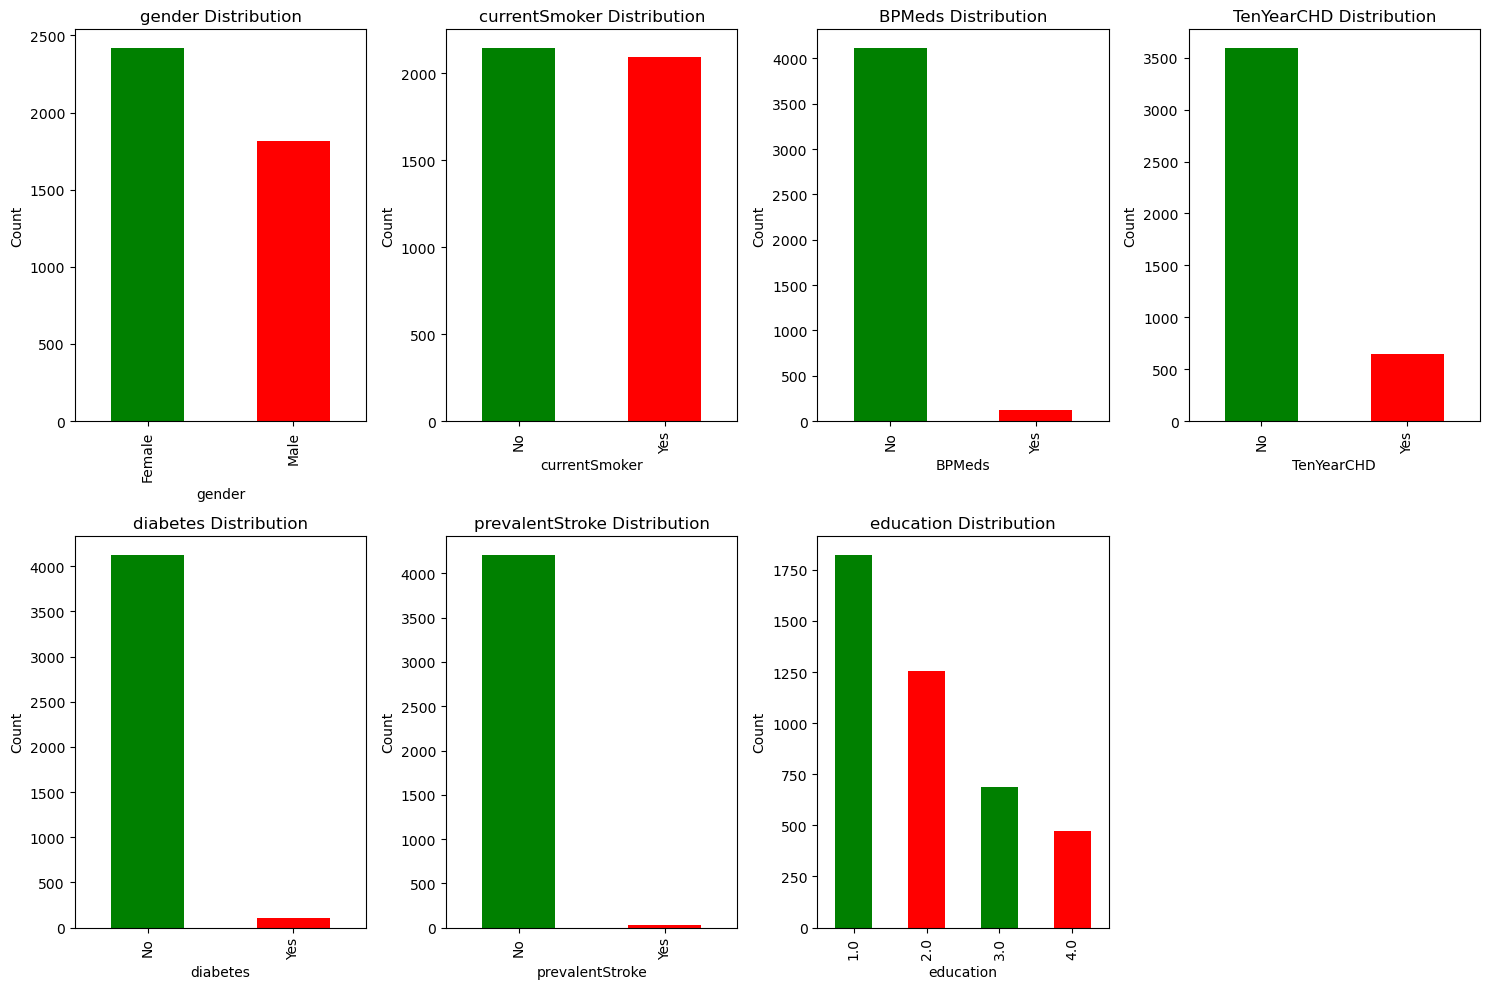

In [152]:
# Set up subplots
num_rows = 2
num_cols = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

categorical_features = ['gender', 'currentSmoker', 'BPMeds', 'TenYearCHD', 'diabetes', 'prevalentStroke', 'education']

# Iterate through variables and create grouped bar charts
for i, feature in enumerate(categorical_features):
    counts = Heart_labeled[feature].value_counts()
    counts.plot(kind='bar', ax=axes[i], color=['green', 'red'])
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Remove the empty subplot if the number of variables is odd
if len(categorical_features) % num_cols != 0:
    fig.delaxes(axes[-1])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

##### iv. Bivariate Analyses

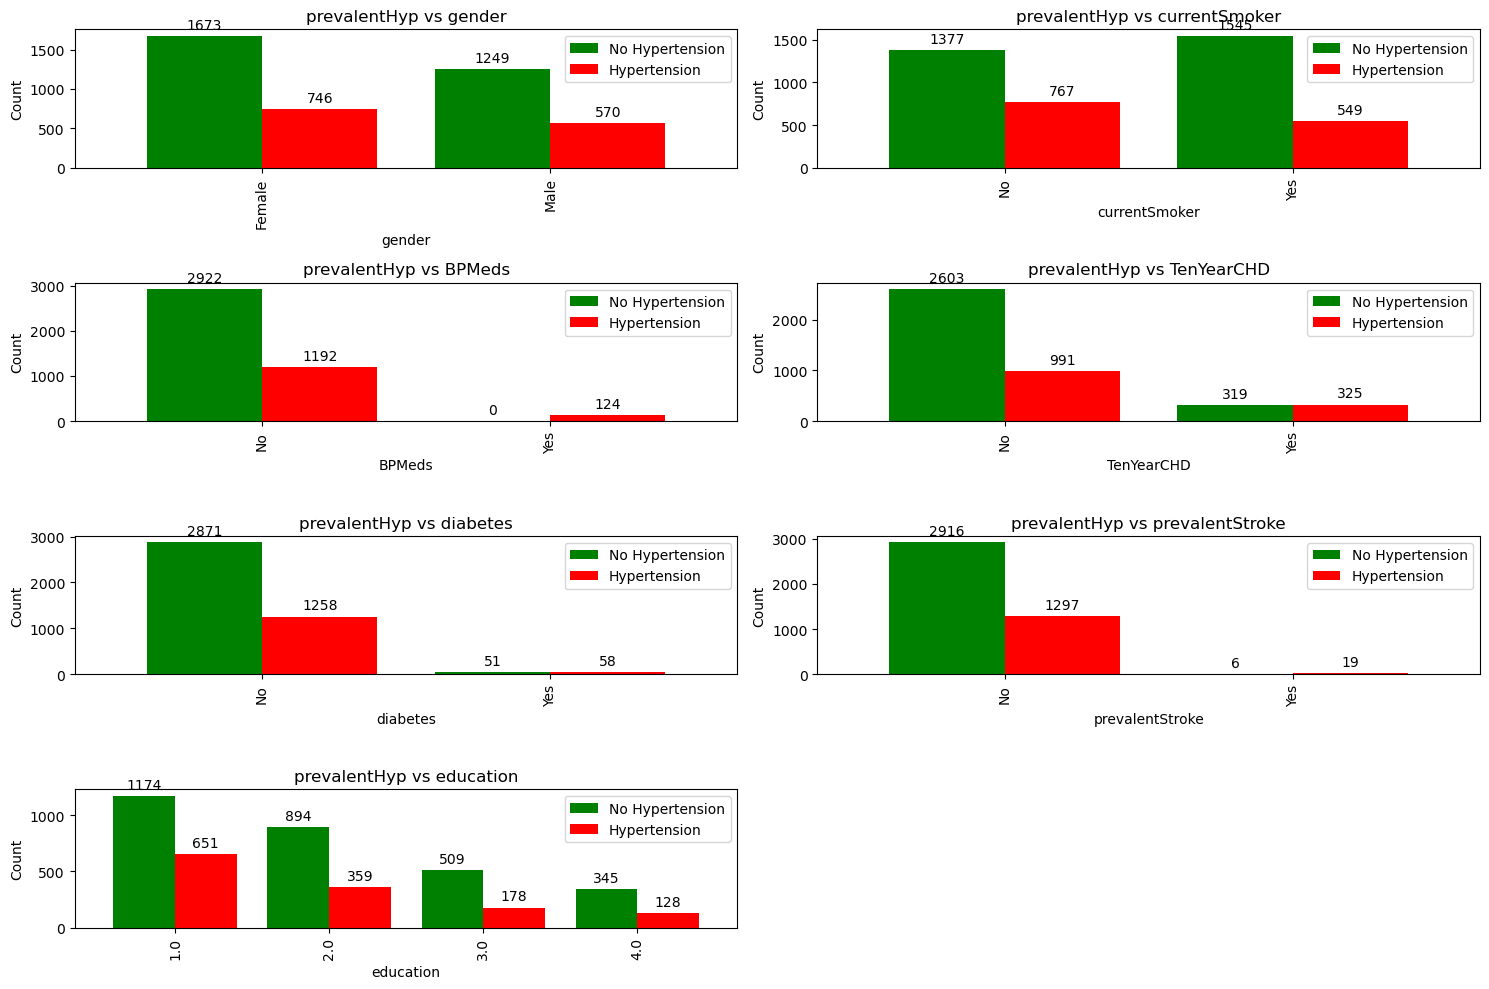

In [153]:
# Set up subplots
num_variables = len(categorical_features)
num_cols = 2
num_rows = (num_variables + 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Iterate through variables and create bivariate bar charts
for i, variable in enumerate(categorical_features):
    # Plot bivariate bar chart
    crosstab_result = pd.crosstab(Heart_labeled[variable], Heart_labeled['prevalentHyp'])
    crosstab_result.plot(kind='bar', ax=axes[i], color=['green', 'red'], width=0.8)
    axes[i].set_title(f'prevalentHyp vs {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Count')
    axes[i].legend(['No Hypertension', 'Hypertension'], loc='upper right')

    # Add value labels
    for bar in axes[i].patches:
        axes[i].annotate(format(bar.get_height(), '.0f'),
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         ha='center', va='center',
                         size=10, xytext=(0, 8),
                         textcoords='offset points')

# Remove the empty subplot if the number of variables is odd
if num_variables % num_cols != 0:
    fig.delaxes(axes[-1])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


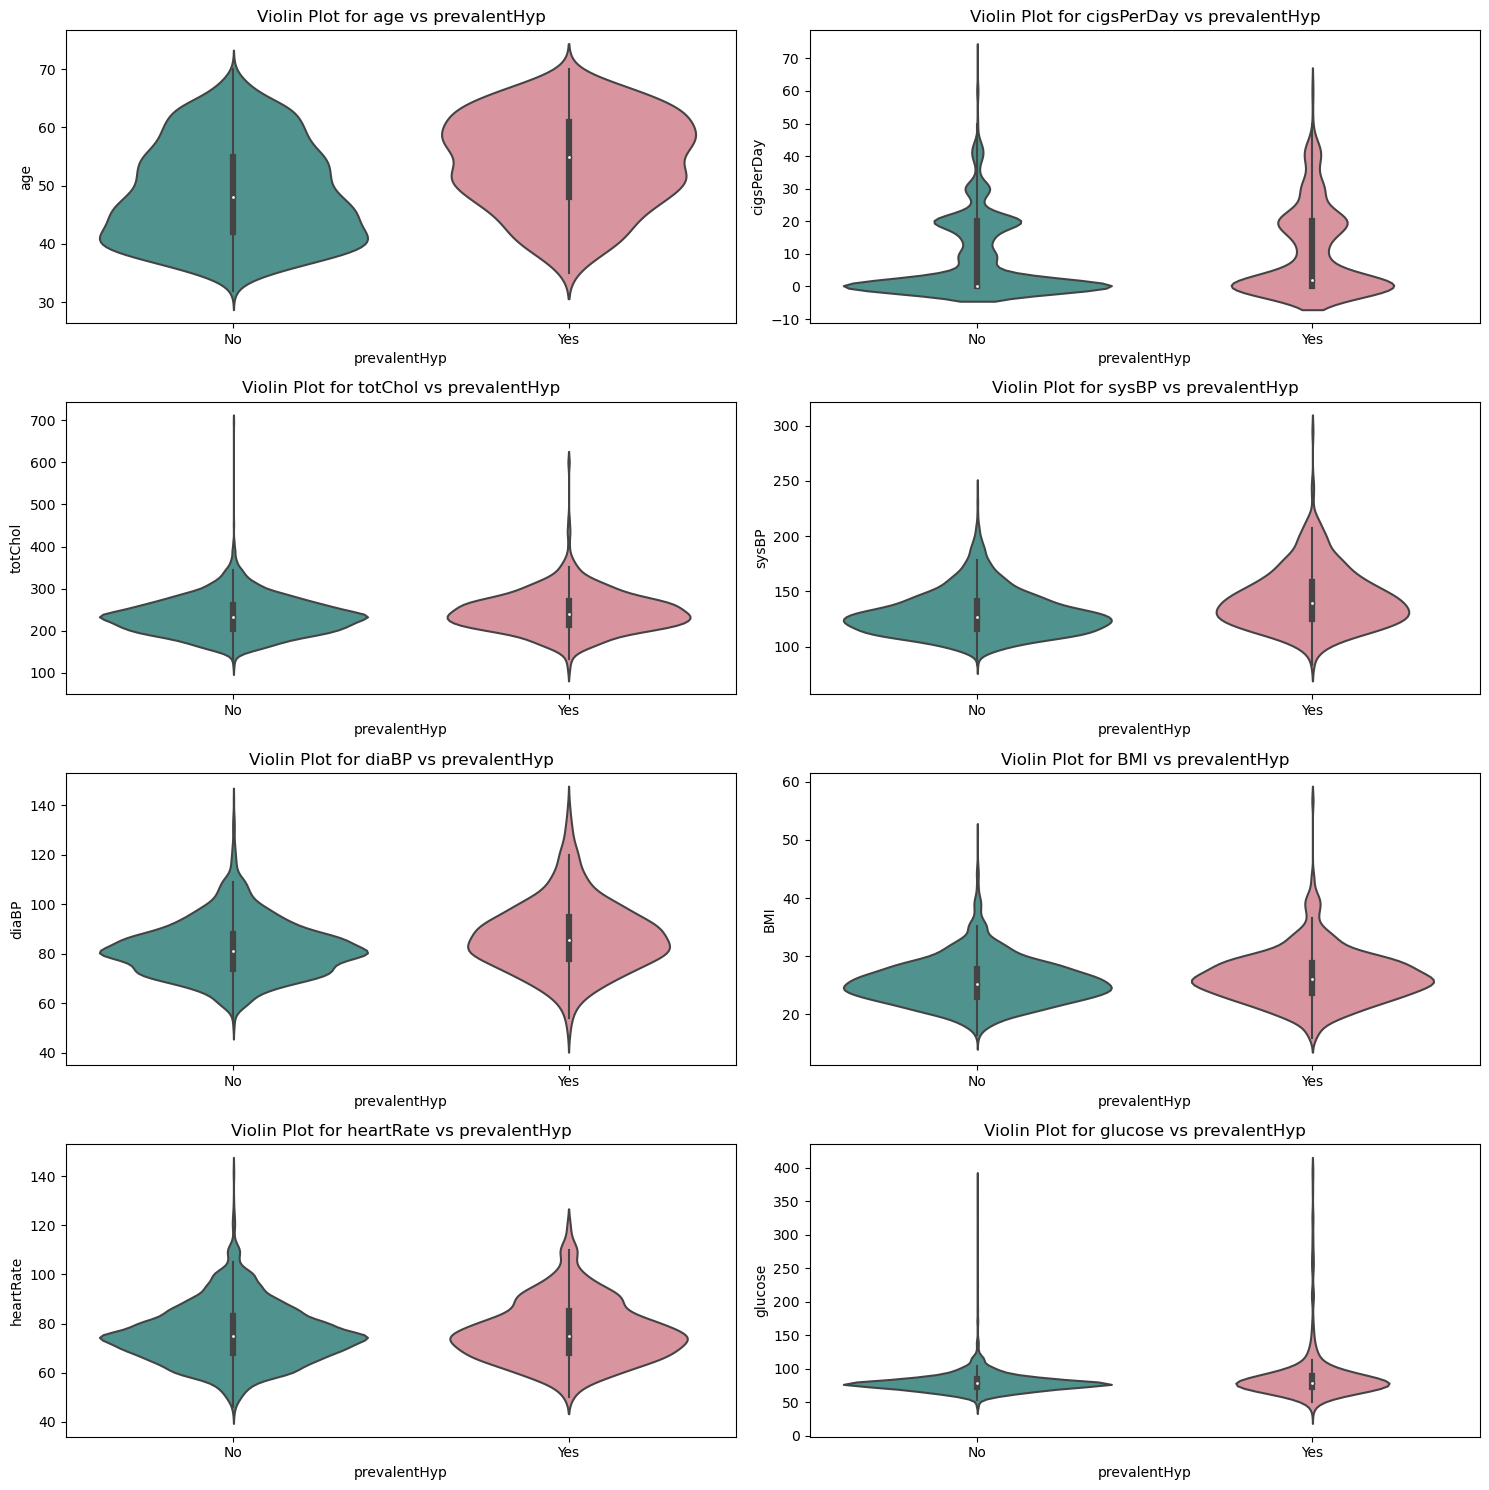

In [154]:
# Set up subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Specify numeric variables
numeric_variables = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Define custom colors
colors = {'Yes': '#e38a99', 'No': '#459e97'}

# Iterate through numeric variables and create violin plots
for i, variable in enumerate(numeric_variables):
    sns.violinplot(x='TenYearCHD', y=variable, data=Heart_labeled, ax=axes[i], palette=colors)
    axes[i].set_title(f'Violin Plot for {variable} vs prevalentHyp')
    axes[i].set_xlabel('prevalentHyp')
    axes[i].set_ylabel(variable)

# Remove the empty subplots if the number of variables is odd
if len(numeric_variables) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

##### v. Multivariable Analyses

<Axes: >

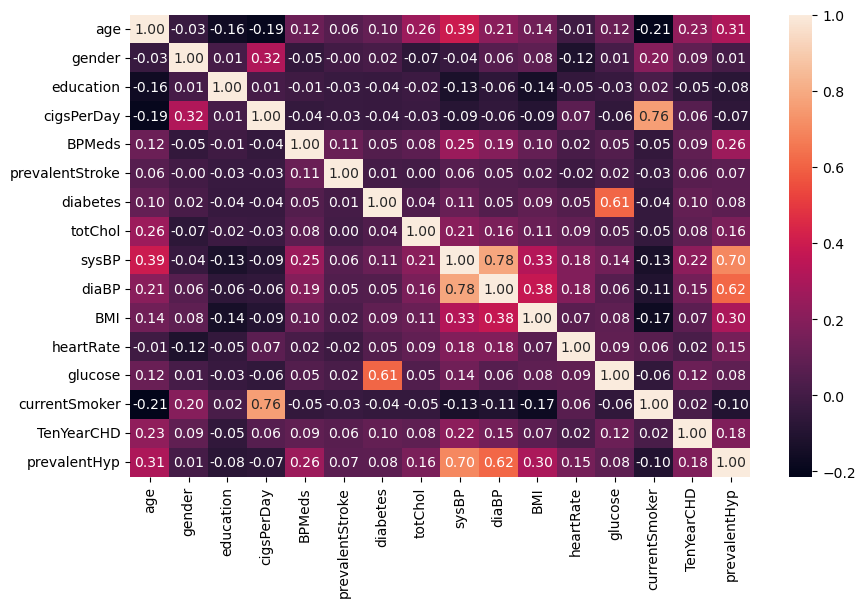

In [155]:
# Correlation Matrix

%matplotlib inline
cor= Heart_data.corr()

plt.figure(figsize = (10,6))
sns.heatmap(cor, annot=True, fmt='.2f')  # Specify fmt='.2f' for two decimal places



Acorrelation matrix for the numeric variables in the Heart_data DataFrame was computed. I used Seaborn's heatmap function to visualize the correlation coefficients between variables, with annotations displaying the correlation values rounded to two decimal places. The heatmap provides a quick overview of the relationships between variables, highlighting potential patterns and dependencies within the dataset. It can be seen that systolic blood pressure diastolic blood pressure, BMI and Age obtained a good correlation with the target variable and thus will be kept in the model

##### v. Feature Selection


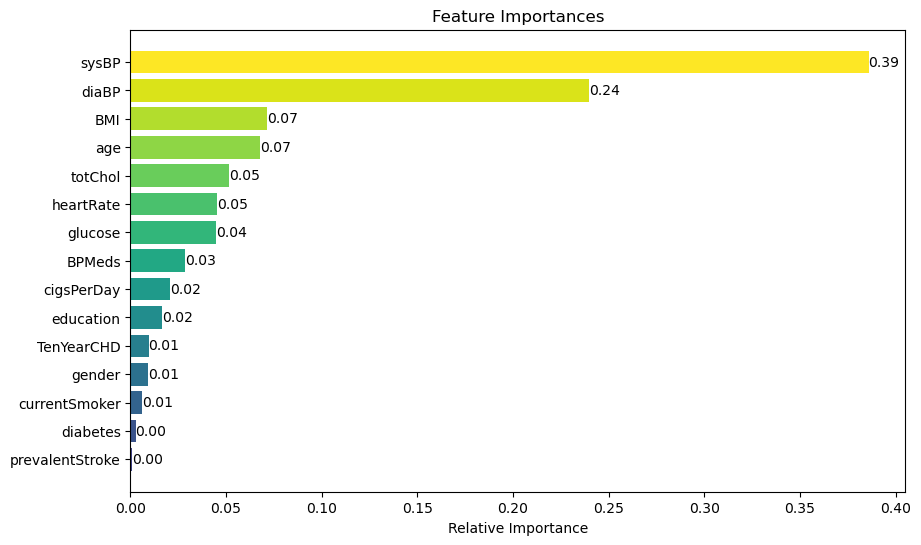

In [156]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Separate features and target variable
X = Heart_data.drop(columns=['prevalentHyp'])
y = Heart_data['prevalentHyp']

# Initialize Random Forest classifier
rf = RandomForestClassifier()

# Fit the classifier to the data
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Get feature names
feature_names = X.columns

# Create a sorted index based on feature importance
sorted_idx = feature_importances.argsort()

# Define colors for gradient
colors = plt.cm.viridis(np.linspace(0.2, 1, len(sorted_idx)))  # Using a deeper gradient

# Plot feature importances
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center', color=colors)

# Add value labels
for bar, importance in zip(bars, feature_importances[sorted_idx]):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, '{:.2f}'.format(importance), 
             va='center', ha='left', color='black')

plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.show()


Systolic blood pressure emerges as the most significant feature, followed by diastolic blood pressure. However, stroke and diabetes show no notable importance in the analysis.

## Feature Selection

In [157]:
Heart_data_selected = Heart_data.drop(columns=['prevalentStroke', 'diabetes','currentSmoker', 'gender', 'TenYearCHD', 'education', 'cigsPerDay'])


The DataFrame Heart_data_selected was created by dropping columns with feature importance scores below 0.03. The columns dropped include 'prevalentStroke', 'diabetes', 'currentSmoker', 'gender', 'TenYearCHD', 'education', and 'cigsPerDay'. This step was taken to focus only on features deemed more significant for further analysis.

In [158]:
Heart_data_selected.head()

,age,BPMeds,totChol,sysBP,diaBP,BMI,heartRate,glucose,prevalentHyp
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Handling Class Imbalance

In [159]:
from sklearn.utils import resample

# Assuming Heart_data_selected is your DataFrame
# Identify the majority and minority classes
majority_class = 0  # Assuming 0 represents the majority class
minority_class = 1  # Assuming 1 represents the minority class

# Separate the majority and minority classes
majority_data = Heart_data_selected[Heart_data_selected['prevalentHyp'] == majority_class]
minority_data = Heart_data_selected[Heart_data_selected['prevalentHyp'] == minority_class]

# Randomly undersample the majority class
majority_data_undersampled = resample(majority_data, n_samples=len(minority_data), random_state=42)

# Combine the undersampled majority class with the minority class
Heart_data_undersampled = pd.concat([majority_data_undersampled, minority_data])

# Shuffle the combined dataset
Heart_data_undersampled = Heart_data_undersampled.sample(frac=1, random_state=42)

# Check the class distribution in the undersampled dataset
print(Heart_data_undersampled['prevalentHyp'].value_counts())

0    1316
1    1316
Name: prevalentHyp, dtype: int64


I performed random undersampling to balance the class distribution in the DataFrame Heart_data_selected. Initially, I identified the majority class (assumed as 0) and minority class (assumed as 1) based on the 'prevalentHyp' column. Then, I separated the majority and minority class data. The majority class data was randomly undersampled to match the size of the minority class using the resample() function from scikit-learn. 

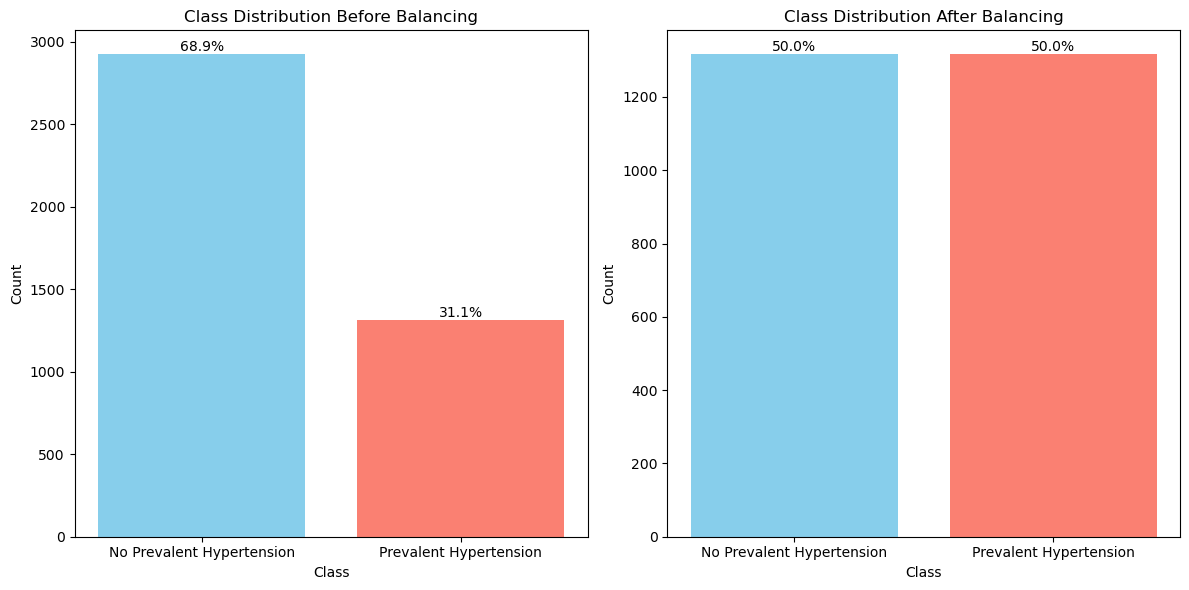

In [160]:


# Define colors for the two classes
colors = ['skyblue', 'salmon']

# Plot class distribution before balancing
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
counts_before = Heart_data_selected['prevalentHyp'].value_counts()
percentages_before = counts_before / counts_before.sum() * 100
bars = plt.bar(counts_before.index, counts_before.values, color=colors)

for bar, percentage in zip(bars, percentages_before):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', 
             ha='center', va='bottom')

plt.title('Class Distribution Before Balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Prevalent Hypertension', 'Prevalent Hypertension'])

# Plot class distribution after balancing
plt.subplot(1, 2, 2)
counts_after = Heart_data_undersampled['prevalentHyp'].value_counts()
percentages_after = counts_after / counts_after.sum() * 100
bars = plt.bar(counts_after.index, counts_after.values, color=colors)

for bar, percentage in zip(bars, percentages_after):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', 
             ha='center', va='bottom')

plt.title('Class Distribution After Balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Prevalent Hypertension', 'Prevalent Hypertension'])

plt.tight_layout()
plt.show()


# Implementing Algorithms

## A. Decision Tree


In [161]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

# Assuming 'TenYearCHD' is the target variable
X = Heart_data_undersampled.drop('prevalentHyp', axis=1)
y = Heart_data_undersampled['prevalentHyp']

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8823529411764706
Precision: 0.8852459016393442
Recall: 0.864
F1 Score: 0.8744939271255061


Upon implementing a standard decision tree model, the obtained evaluation metrics revealed promising performance. The accuracy of the model stood at 0.882, indicating the proportion of correctly classified instances. 

<Figure size 800x600 with 0 Axes>

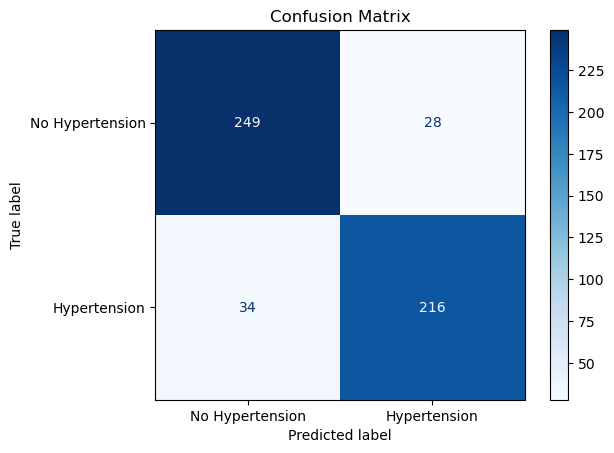

In [162]:

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['No Hypertension', 'Hypertension'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


### Drawing the Tree 

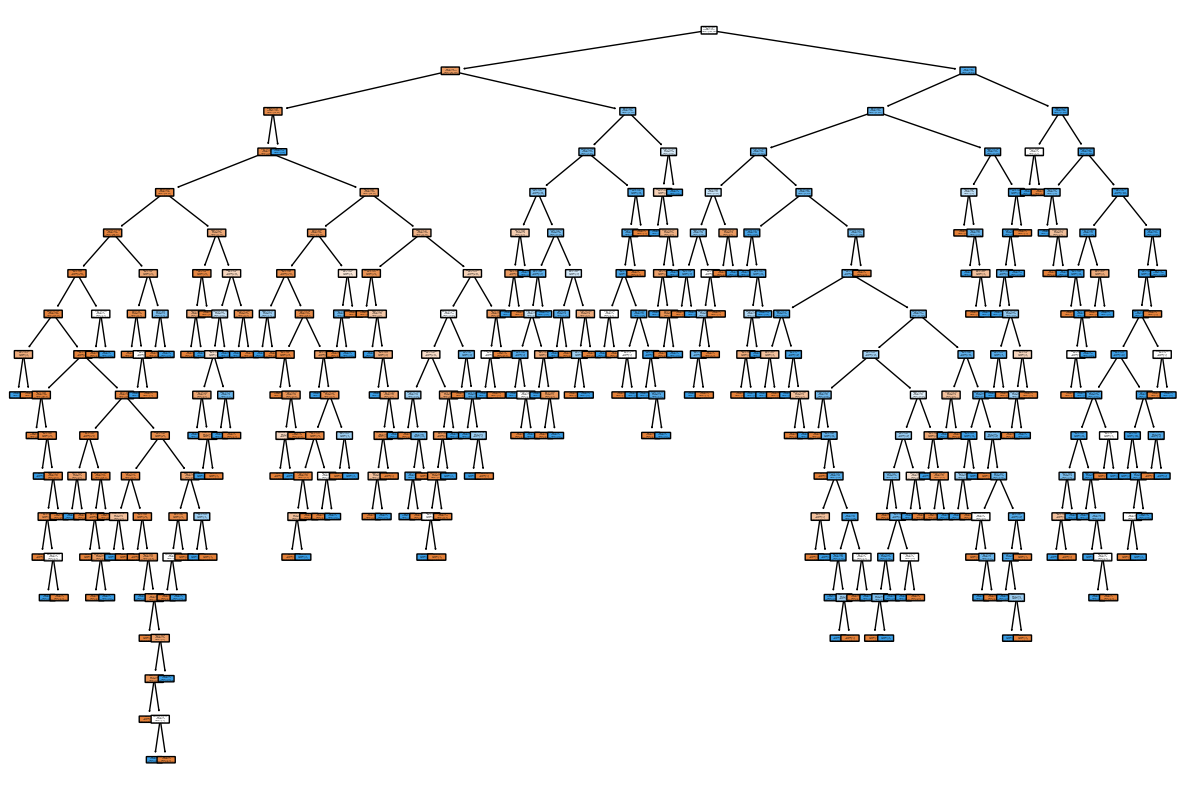

In [163]:

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Hypertension', 'Hypertension'], rounded=True)
plt.show()


### Optimized Decision Tree

In [164]:
# Define the parameter grid for grid search
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be a leaf node
}

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train Decision Tree model with the best hyperparameters
best_clf = DecisionTreeClassifier(random_state=42, **best_params)
best_clf.fit(X_train, y_train)

# Make predictions
y_pred = best_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Evaluate model
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}

Accuracy: 0.9032258064516129
Precision: 0.8871595330739299
Recall: 0.912
F1 Score: 0.8994082840236687

Confusion Matrix:
 [[248  29]
 [ 22 228]]


I imported necessary libraries and conducted a grid search to optimize hyperparameters for a Decision Tree classifier. Then, I trained the model with the best parameters, made predictions, and evaluated its performance using metrics such as accuracy, precision, recall, and F1 score. When you compare this with the unoptimized model it is evident that the performance has increased. For instance accuracy has increased to 90% from the initial 88%

<Figure size 800x600 with 0 Axes>

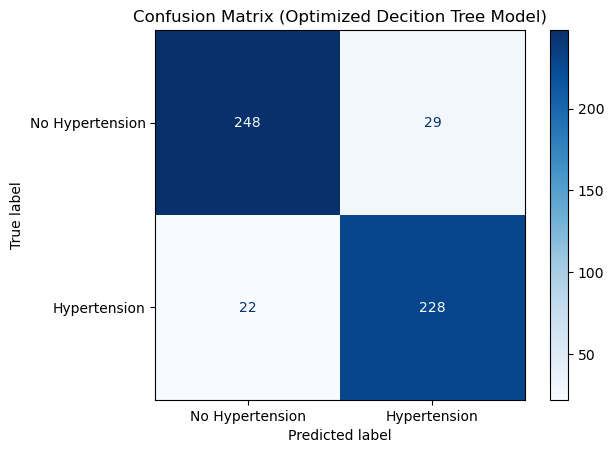

In [165]:


# Calculate confusion matrix for the optimized model
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(cm, display_labels=['No Hypertension', 'Hypertension']).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Optimized Decition Tree Model)')
plt.show()


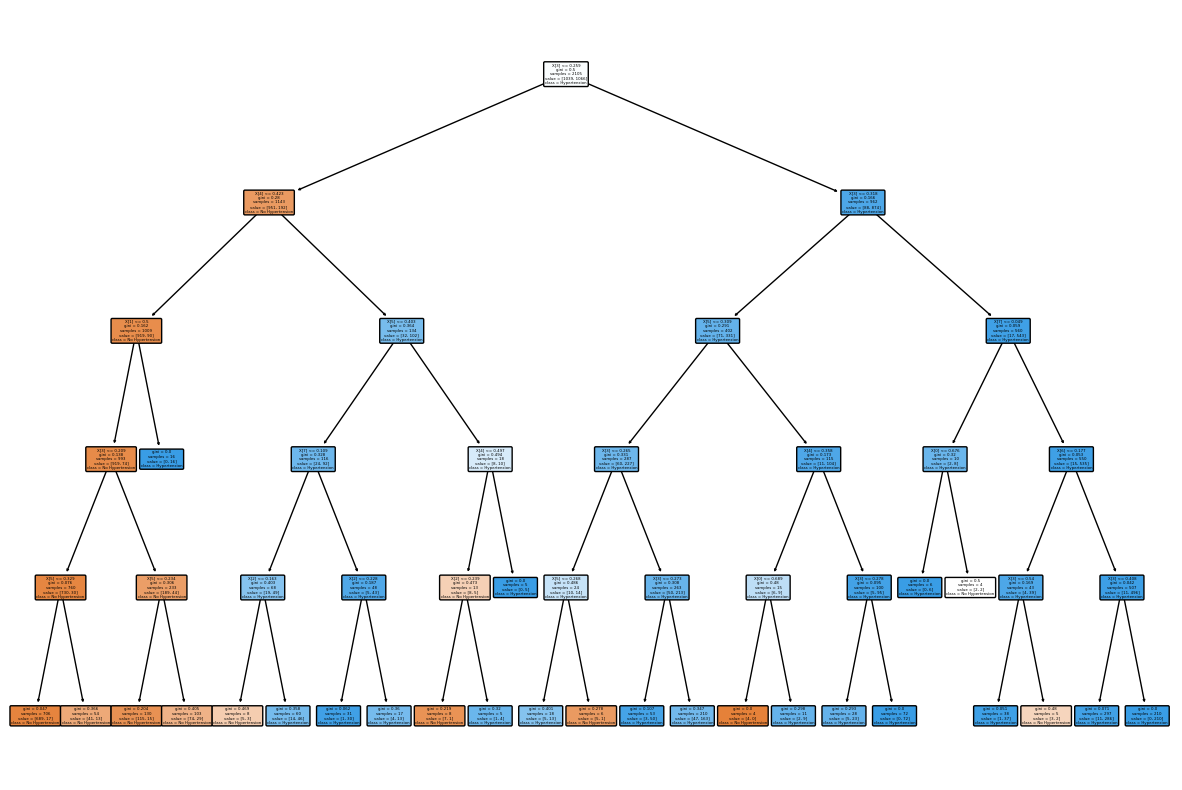

In [166]:
# Plot the decision tree of the optimized model
plt.figure(figsize=(15, 10))
plot_tree(best_clf, filled=True, rounded=True, class_names=['No Hypertension', 'Hypertension'])
plt.show()


<Figure size 800x600 with 0 Axes>

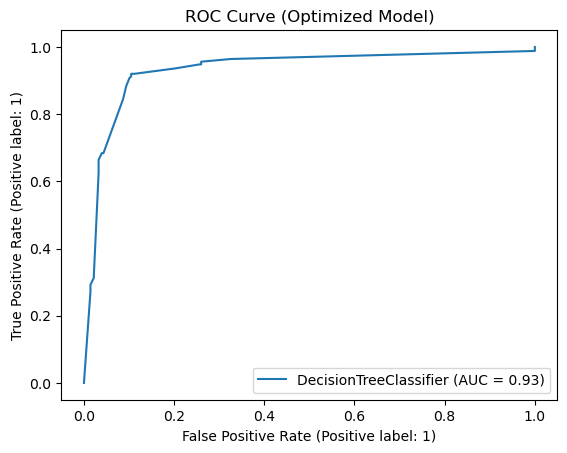

In [167]:

# Plot ROC curve for the optimized model
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(best_clf, X_test, y_test)
plt.title('ROC Curve (Optimized Model)')
plt.show()


## B. Implementing SVM

In [168]:

# Define SVM model
svm = SVC(kernel='linear', random_state=42)

# Create a pipeline with SVM model
pipeline = make_pipeline(svm)

# Train SVM model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Evaluate model
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8956356736242884
Precision: 0.8853754940711462
Recall: 0.896
F1 Score: 0.8906560636182902

Confusion Matrix:
 [[248  29]
 [ 26 224]]


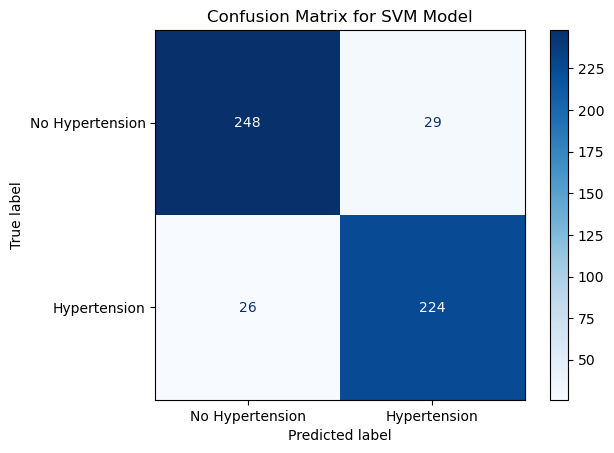

In [169]:


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Hypertension', 'Hypertension'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for SVM Model')
plt.show()


## Optimized SVM Model

In [170]:

# Define SVC model
svm = SVC(random_state=42)

# Create a pipeline with SVC model
pipeline = make_pipeline(svm)

# Define the parameter grid for GridSearchCV
param_grid = {
    'svc__C': [1, 5, 10, 50, 100, 200],
    'svc__gamma': [0.0001, 0.0005, 0.001, 0.005],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Different kernel types
}

# Create the GridSearchCV object
grid = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the model to the training data
start_time = time.time()
grid.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found by grid search:")
print(grid.best_params_)

# Reassign the best estimator found by GridSearchCV
pipeline = grid.best_estimator_

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Evaluate model
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best parameters found by grid search:
{'svc__C': 5, 'svc__gamma': 0.0001, 'svc__kernel': 'linear'}

Accuracy: 0.905123339658444
Precision: 0.8846153846153846
Recall: 0.92
F1 Score: 0.9019607843137256

Confusion Matrix:
 [[247  30]
 [ 20 230]]


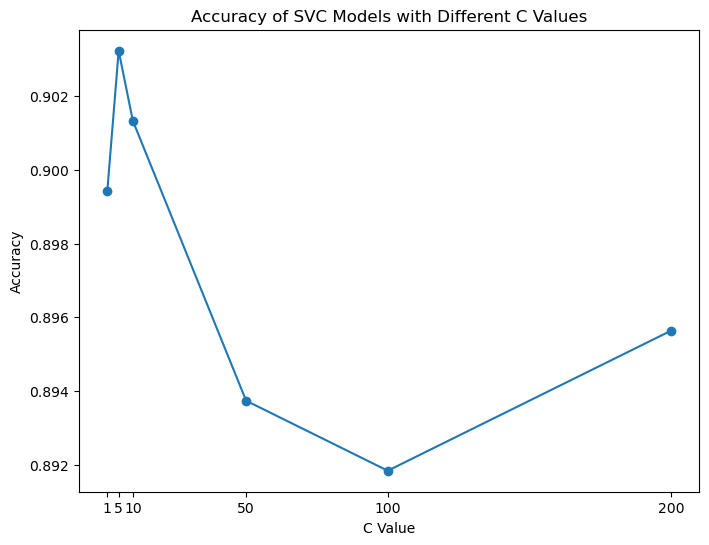

In [171]:

# Define SVC models with different C values
C_values = [1, 5, 10, 50, 100, 200]
svc_models = []
accuracies = []

for C in C_values:
    # Create SVC model with current C value
    svm = SVC(C=C, gamma='scale', kernel='rbf', random_state=42)
    svc_models.append(svm)
    
    # Fit the model to the training data
    svm.fit(X_train, y_train)
    
    # Make predictions
    y_pred = svm.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(8, 6))
plt.plot(C_values, accuracies, marker='o')
plt.title('Accuracy of SVC Models with Different C Values')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.xticks(C_values)
plt.grid(False)
plt.show()


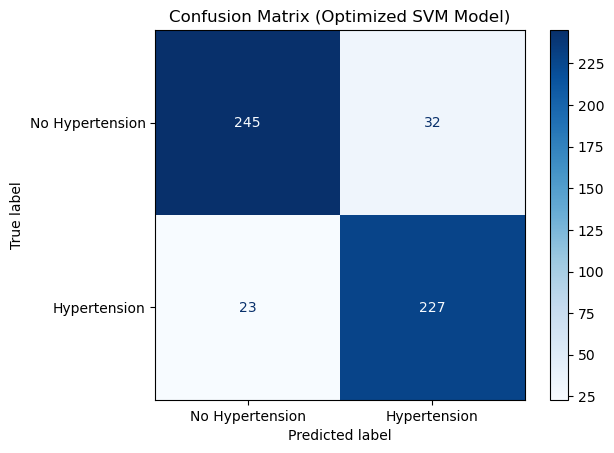

In [172]:

# Obtain confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Hypertension', 'Hypertension'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Optimized SVM Model)')
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


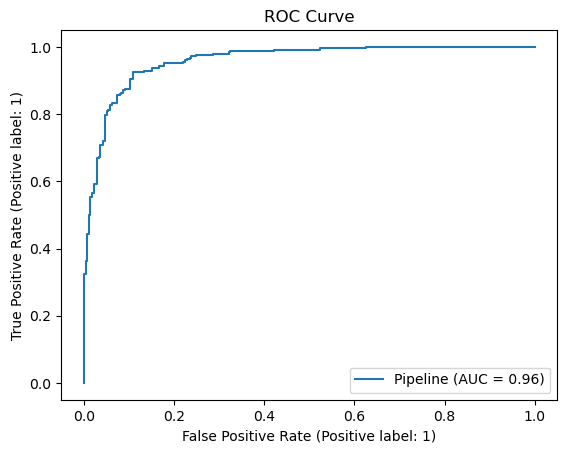

In [173]:
from sklearn.metrics import plot_roc_curve

# Plot ROC curve
plot_roc_curve(pipeline, X_test, y_test)
plt.title('ROC Curve')
plt.show()


## C. Logistic Regression Model

Accuracy: 0.8994307400379506
Precision: 0.8955823293172691
Recall: 0.892
F1 Score: 0.8937875751503007


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


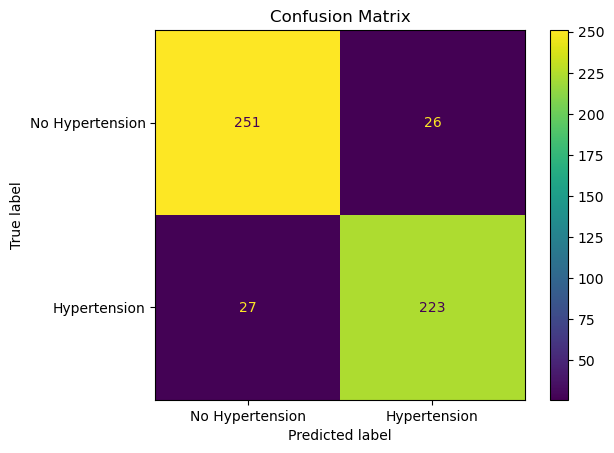

In [174]:


# Define Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)

# Train Logistic Regression model
logistic_regression.fit(X_train, y_train)

# Make predictions
y_pred = logistic_regression.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion Matrix
plot_confusion_matrix(logistic_regression, X_test, y_test, display_labels=['No Hypertension', 'Hypertension'])
plt.title('Confusion Matrix')
plt.show()


In [175]:
print (y_pred)

[0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0
 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0
 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0
 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1
 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0
 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1
 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1
 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0
 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1
 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0
 1 1 1 0 1 1 1 1 0 0 1 1 

## Optimized Logistic Model

In [176]:


# Define Logistic Regression model
logistic_regression = LogisticRegression(solver='liblinear', random_state=42)

# Define hyperparameters grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Penalty term
}

# Create GridSearchCV object
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Train GridSearchCV
grid_search.fit(X_train, y_train)

# Get best estimator
best_logistic_regression = grid_search.best_estimator_

# Fit the logistic regression model with statsmodels for summary
logit_model = sm.Logit(y_train, sm.add_constant(X_train))  # Add constant for intercept
result = logit_model.fit()

# Print model summary
print(result.summary())


         Current function value: 0.293980
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           prevalentHyp   No. Observations:                 2105
Model:                          Logit   Df Residuals:                     2096
Method:                           MLE   Df Model:                            8
Date:                Wed, 08 May 2024   Pseudo R-squ.:                  0.5758
Time:                        22:58:43   Log-Likelihood:                -618.83
converged:                      False   LL-Null:                       -1458.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.3207      0.561    -18.401      0.000     -11.420      -9.221
x1             0.7512      0.357      2.103      0.035       0.05

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


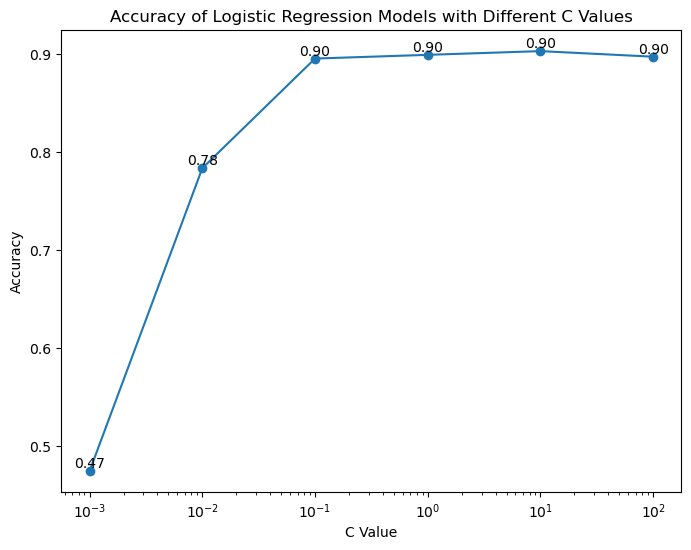

In [177]:

# Define Logistic Regression models with different C values
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
lr_models = []
accuracies = []

for C in C_values:
    # Create Logistic Regression model with current C value
    logistic_regression = LogisticRegression(C=C, solver='liblinear', random_state=42)
    lr_models.append(logistic_regression)
    
    # Fit the model to the training data
    logistic_regression.fit(X_train, y_train)
    
    # Make predictions
    y_pred = logistic_regression.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(8, 6))
plt.plot(C_values, accuracies, marker='o')
plt.title('Accuracy of Logistic Regression Models with Different C Values')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.xscale('log')  # Set x-axis to logarithmic scale for better visualization

# Add value labels
for i, acc in enumerate(accuracies):
    plt.text(C_values[i], acc, f'{acc:.2f}', ha='center', va='bottom')

plt.grid(False)  # Remove grid lines
plt.show()


In [178]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best parameters: {'C': 0.1, 'penalty': 'l1'}
Accuracy: 0.8975332068311196
Precision: 0.8858267716535433
Recall: 0.9
F1 Score: 0.8928571428571428


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


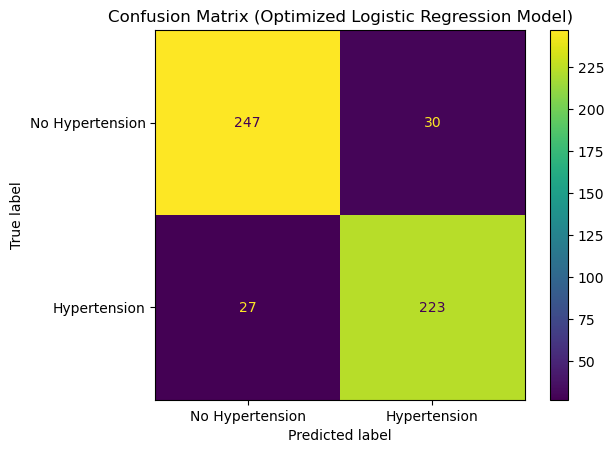

In [179]:
# Confusion Matrix
plot_confusion_matrix(best_logistic_regression, X_test, y_test, display_labels=['No Hypertension', 'Hypertension'])
plt.title('Confusion Matrix (Optimized Logistic Regression Model)')
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


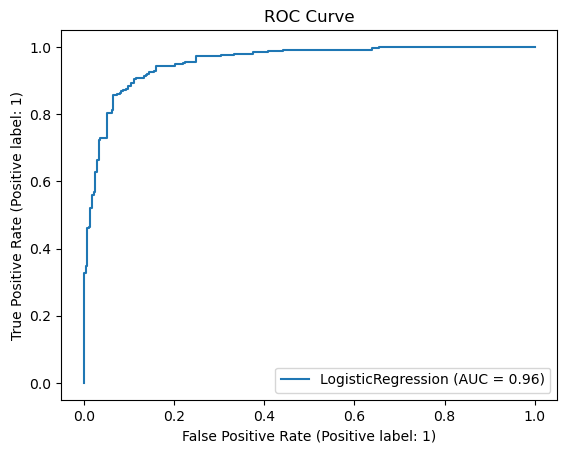

In [180]:

# Plot ROC curve for the logistic regression model
plot_roc_curve(best_logistic_regression, X_test, y_test)
plt.title('ROC Curve')
plt.show()


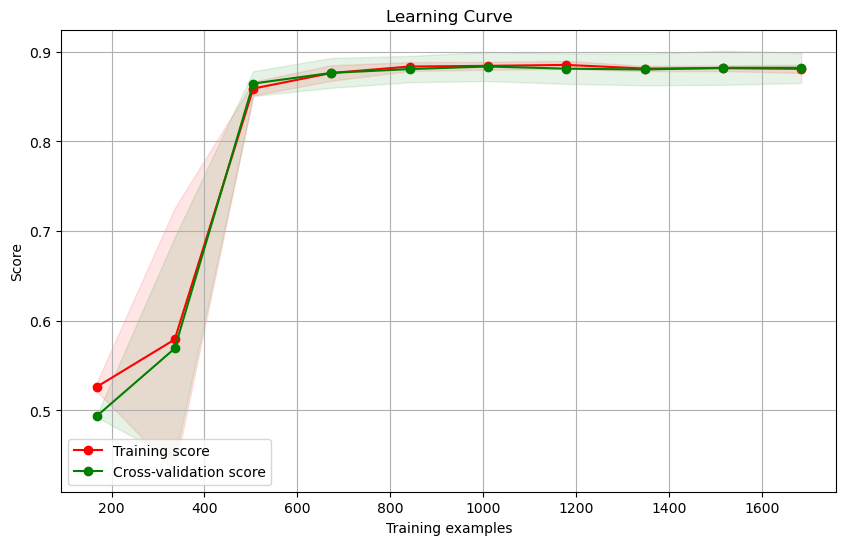

In [181]:
# Define a function to plot learning curve
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot learning curve for the logistic regression model
plot_learning_curve(best_logistic_regression, X_train, y_train)


In [182]:
# Get the shape of X_train
num_rows, num_features = X_train.shape

print("Number of features in X_train:", num_features)


Number of features in X_train: 8


## D. GradiantBoost

In [183]:

# Assuming X_train, X_test, y_train, y_test are your training and testing data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier()

# Fit the classifier to the training data
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred = gb_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


Accuracy: 0.920303605313093
Precision: 0.9031007751937985
Recall: 0.932
F1 Score: 0.9173228346456693


## Optimized Gradient Boost Model

In [185]:
# Define the parameter distributions
param_dist = {
    'n_estimators': randint(50, 150),  # Number of trees in the forest
    'learning_rate': [0.05, 0.1, 0.2],  # Learning rate
    'max_depth': randint(3, 6),  # Maximum depth of each tree
    'min_samples_split': randint(2, 11),  # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 5)  # Minimum number of samples required at each leaf node
}

# Instantiate the GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=gb_clf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Evaluate the model with best parameters
y_pred = random_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 62}
Accuracy: 0.9165085388994307
Precision: 0.8961538461538462
Recall: 0.932
F1 Score: 0.9137254901960785


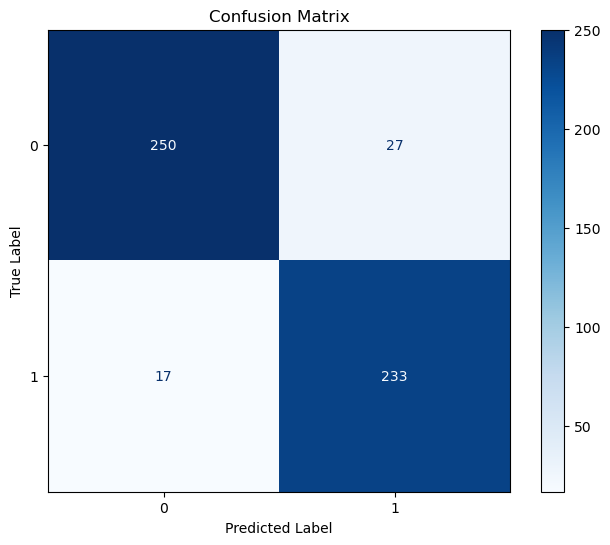

In [186]:


# Assuming you have already calculated the confusion matrix cm and y_pred
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_search.best_estimator_.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())  # Specify the axis for plotting
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


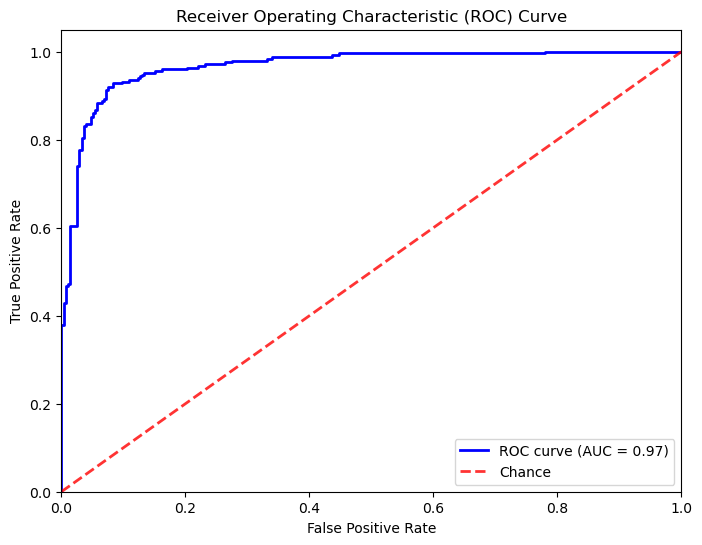

In [187]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already trained a model and defined X_test and y_test
# Get predicted probabilities
y_proba = random_search.best_estimator_.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## E. Naives Bayes'

In [188]:

# Create a Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the classifier
naive_bayes.fit(X_train, y_train)

# Make predictions
y_pred = naive_bayes.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7419354838709677
Precision: 0.9453125
Recall: 0.484
F1 Score: 0.6402116402116402


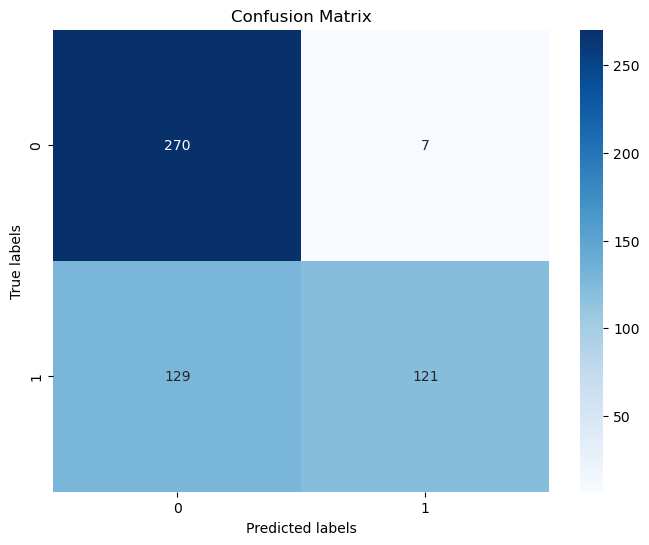

In [189]:

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


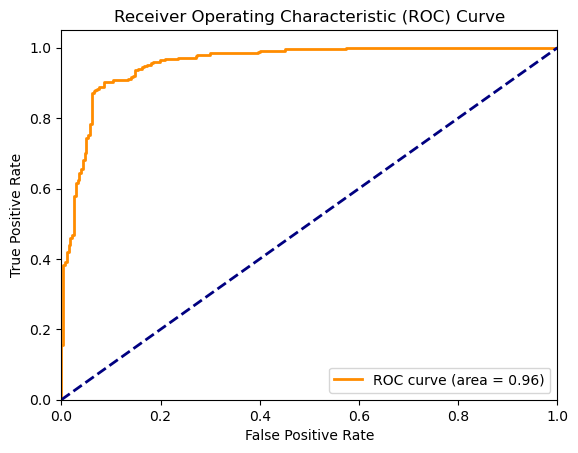

In [190]:

# Get the predicted probabilities of the positive class
y_probs = naive_bayes.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


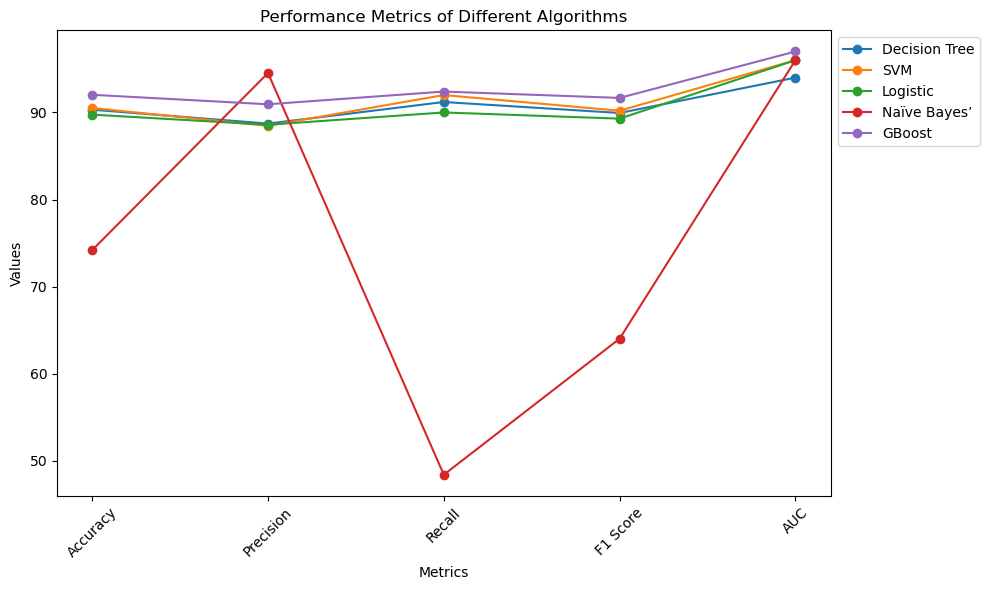

In [191]:

# Performance metrics for each algorithm
algorithms = ['Decision Tree', 'SVM', 'Logistic', 'Naïve Bayes’', 'GBoost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']

# Values for each metric
values = {
    'Decision Tree': [90.32, 88.72, 91.2, 89.94, 94],
    'SVM': [90.51, 88.46, 92, 90.2, 96],
    'Logistic': [89.75, 88.59, 90, 89.29, 96],
    'Naïve Bayes’': [74.19, 94.53, 48.4, 64.02, 96],
    'GBoost': [92.03, 90.94, 92.40, 91.67, 97]
}

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot lollipop markers
for i, algorithm in enumerate(algorithms):
    ax.plot(metrics, values[algorithm], marker='o', label=algorithm)

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics of Different Algorithms')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
